The final test

- will be based on lectures 1-4 and practical classes 1-8
- will consist of 10-15 short questions (without computers) and 2 exercises to implement and solve in Python (with computers).

Examples of short questions:

- <h4>  Ex1: Given a confusion matrix

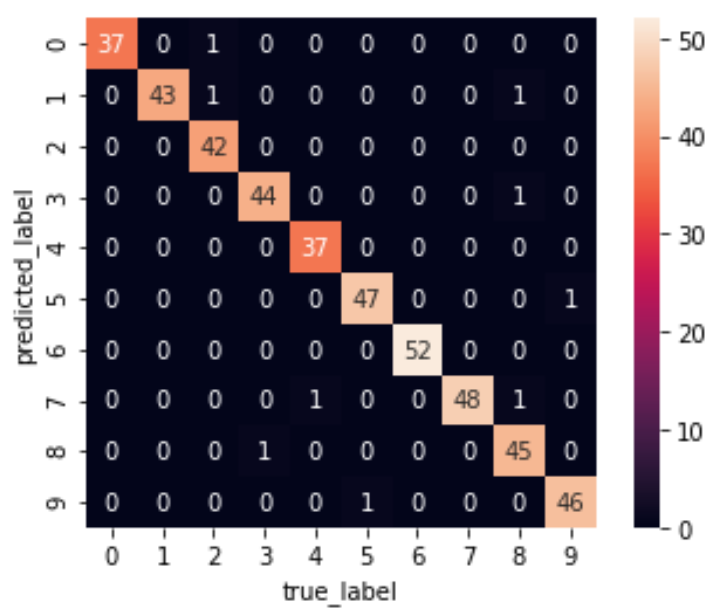

In [1]:
from IPython import display
display.Image("cm.png", width="500", height="300")

In [40]:
TP = 45
FP = 1 #model said 8 but it wasn't..
FN = 3 #true label was 8 but model didn't recognize it...

Precision  = TP/(TP+FP)
Recall = TP/(TP+FN)

F1 = 2/(1/Precision + 1/Recall)

<h4> Calculate: precision, recall and f1-score for the digit 8.

- <h4> Ex2: For the data: 
    
x | 1 | 2 | 3 |
    
y | 2 | 4 | 5 |

we built a linear model $y=1.5x+0.67$
    
Answer the folllowing question:
- Predict $y$ value for $x=4$.
- What is the $R^2$ and $MSE$ for such as model? (write expression only)


In [52]:
x = np.array([1,2,3])
y = np.array([2,4,5])
y_pred = 1.5*x+0.67

print(y_pred)

[2.17 3.67 5.17]


In [48]:
np.mean(y)

3.6666666666666665

In [49]:
R2 = sum((y_pred - 3.66)**2)/sum((y-3.66)**2)
print(R2)

0.9643224479300595


In [53]:
MSE = 1/3*(sum((y-y_pred)**2))
print(MSE)

0.05556666666666667


- <h4> Ex3: For the data: 
    
x | 1 | 2 | 3 |
    
y | 0 | 0 | 1 |

we built two logistic regression models:

- $p(x) = \frac{1}{1+e^{-47x+116}}$ (model 1)
    
    
- $p(x) = \frac{1}{1+e^{-5x+3}}$ (model 2)
    
    
What is the probability of y=1 provided x=2 according to both models? (write expression only)
    
Calculte $BCE$ for both models. (write expression only)

In [54]:
x = np.array([1,2,3])
y = np.array([0,0,1])

p1 = 1/(1+np.exp(-47*x+116))
p2 = 1/(1+np.exp(-5*x+3))

print(p1)
print()
print(p2)

[1.08063928e-30 2.78946809e-10 1.00000000e+00]

[0.88079708 0.99908895 0.99999386]


In [55]:
bce1 = -1/3 * (np.log(1-0)+np.log(1-0)+np.log(1))
print(bce1)

-0.0


In [56]:
bce2 = -1/3 * (np.log(1-0.88079708)+np.log(1-0.99908895)+np.log(0.99999386))
print(bce2)

3.0426156484979465


- <h4> Ex4: What is not true for the Gradient Descent algorithm?


    
- the optimization step may be regulated
    
- the aim is to minimize a given function
    
- easy to implement
 
- always provides optimal solution


D)

Exercises to implement 

<h4> Exercise1: Consider "spam_ham.txt" file containing spam and ham messages.
   
<br> 
    
    
- apply TF-IDF methods. How many features has this dataset?
- what is the number of zeros in the data?
- reduce the number of features to 2; what is the explained variance of 2 components? is it satisfactory; plot the dependence between PC1 and PC2 and colour points according to their labels.
- how many components we need to save to have the exaplined variance at least  80%?
- compare some classification algorithms on original and reduced dataset.
    

In [58]:
f  = open("spam_ham.txt","r", encoding = "utf-8")
X = []
y = []
for line in f:
    if "ham" in line:
        X.append(line.split("ham")[1][1:])
        y.append(0)
    else:
        X.append(line.split("spam")[1][1:])
        y.append(1)
f.close()

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [60]:
vec = TfidfVectorizer()
Xv = vec.fit_transform(X)

In [61]:
Xv.shape

(5574, 8678)

In [62]:
Xv.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
import numpy as np
n_zeros = np.count_nonzero(Xv.toarray()==0)
print(n_zeros)

48297221


In [64]:
n_zeros/(5574*8678)

0.998471176179068

In [65]:
vec.get_feature_names_out()

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [66]:
pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xv.toarray())

In [67]:
pca.explained_variance_ratio_ #insufficient

array([0.00962126, 0.00873403])

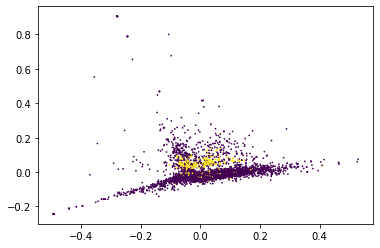

In [68]:
import matplotlib.pyplot as plt

plt.scatter(Xpca[:,0],Xpca[:,1], c = y, s = 0.5)
plt.show()

In [72]:
pca = PCA(n_components=1500) 
Xpca = pca.fit_transform(Xv.toarray())

In [73]:
sum(pca.explained_variance_ratio_)

0.833214086233269

<h4> Exercise2: Consider the following data

In [76]:
import numpy as np
import matplotlib.pyplot as plt 


n = 500

x1 = np.random.uniform(-100,100,n)
x2 = np.random.uniform(-100,100,n)
X1 =[[x1[i],x2[i]] for i in range(n) if x2[i]<x1[i]+50 and  x2[i]>x1[i]-50]
X2 =[[x1[i],x2[i]] for i in range(n) if x2[i]>=x1[i]+70 or  x2[i]<=x1[i]-70]
X = np.array(X1+X2)
y = np.array([1]*len(X1)+[0]*len(X2))

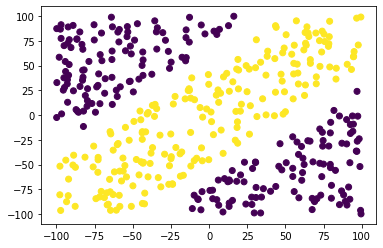

In [77]:
plt.scatter(X[:,0],X[:,1], c = y)
plt.show()

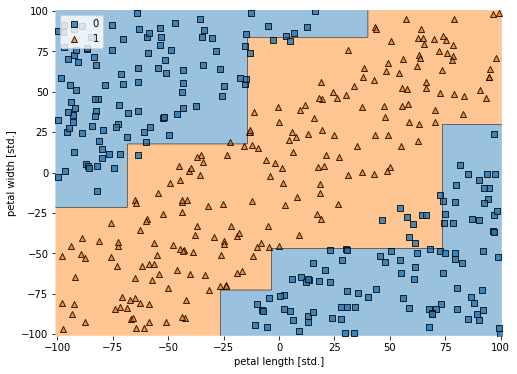

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)
tree.fit(X_train, y_train);

from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X, y=y, clf=tree)
plt.xlabel('petal length [std.]')
plt.ylabel('petal width [std.]')
plt.legend(loc='upper left')
plt.show()

<h4> Build a classifier based on probability defined as $p = \frac{1}{1+(w_1x_1+w_2x_2+w_0)^2}$.
    
Notice that such as dataset is difficult for logistic regression, SVM or decision trees. Why? Which of these methods would have the best performance?

In [78]:
import numpy as np 
from scipy.optimize import minimize


class Model:
    
    def loss(self, X, y, W):
        L = 0
        N = len(X)
        for i in range(N):
            p = 1/(1+(sum(W*np.append(X[i],1)))**2)
            L += y[i]*np.log(p)+(1-y[i])*np.log(1-p)
        L = (-1/N)*L
        return L
    
    def predict_p(self, W, x):
        return  1/(1+(sum(W*np.append(x,1)))**2)
    
    def estimate_params(self, X, y):
        res = minimize(lambda w: self.loss(X,y,w), [1,1,1], method='SLSQP')
        return res.x    

In [87]:
from sklearn.model_selection import train_test_split

t = Model()
t.estimate_params(X_train, y_train)

array([-0.01933373,  0.01993096, -0.01639577])

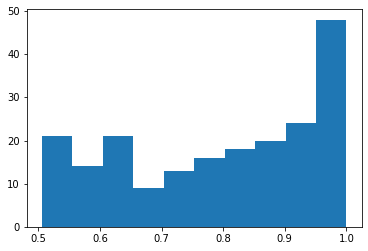

In [88]:
plt.hist([t.predict_p([-0.01933373,  0.01993096, -0.01639577],X1[i]) for i in range(len(X1))])
plt.show()

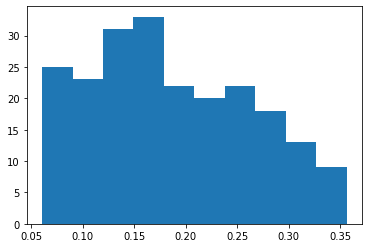

In [89]:
plt.hist([t.predict_p([-0.01933373,  0.01993096, -0.01639577],X2[i]) for i in range(len(X2))])
plt.show()

In [91]:
len(y_test)

126

In [90]:
sum(y_test == [1 if t.predict_p([-0.01933373,  0.01993096, -0.01639577],X_test[i])>0.5 else 0 for i in range(len(y_test))])

126

Why does it work? Please plot $z=\frac{1}{1+(x+y)^2}$ using https://www.geogebra.org/3d?lang=en.